In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
#skips comments and read the rest of the lines
with open("ASTR19_S22_group_project_data.txt", "r") as f:
    f.readline()
    f.readline()
    f.readline()
    
    lines = f.readlines()

# empty arrays
d = []
t = []
h = []

# create arrays for day, time, and height
for line in lines:
    day, time, height = line.split()
    d.append(day)
    t.append(time)
    h.append(height)
    

In [21]:
# set up arrays
x = np.arange(8, 984, 6.2)



[  8.     14.125  20.25   26.375  32.5    38.625  44.75   50.875  57.
  63.125  69.25   75.375  81.5    87.625  93.75   99.875 106.    112.125
 118.25  124.375 130.5   136.625 142.75  148.875 155.    161.125 167.25
 173.375 179.5   185.625 191.75  197.875 204.    210.125 216.25  222.375
 228.5   234.625 240.75  246.875 253.    259.125 265.25  271.375 277.5
 283.625 289.75  295.875 302.    308.125 314.25  320.375 326.5   332.625
 338.75  344.875 351.    357.125 363.25  369.375 375.5   381.625 387.75
 393.875 400.    406.125 412.25  418.375 424.5   430.625 436.75  442.875
 449.    455.125 461.25  467.375 473.5   479.625 485.75  491.875 498.
 504.125 510.25  516.375 522.5   528.625 534.75  540.875 547.    553.125
 559.25  565.375 571.5   577.625 583.75  589.875 596.    602.125 608.25
 614.375 620.5   626.625 632.75  638.875 645.    651.125 657.25  663.375
 669.5   675.625 681.75  687.875 694.    700.125 706.25  712.375 718.5
 724.625 730.75  736.875 743.    749.125 755.25  761.375 767.5  

In [15]:
time_values = np.arange(0, 24 * 60, 1)
actual_tide_values = 2 * np.sin(2 * np.pi / (12 * 60) * time_values) + 0.5 * np.random.normal(size=len(time_values))

# Function to model tide variation
def tide_function(time, amplitude, frequency, phase_shift):
    return amplitude * np.sin(frequency * time + phase_shift)

# Fit the model to the data
params, covariance = curve_fit(tide_function, time_values, actual_tide_values, p0=[1, 2 * np.pi / (12 * 60), 0])

# Generate tide values using the fitted parameters
fitted_tide_values = tide_function(time_values, *params)



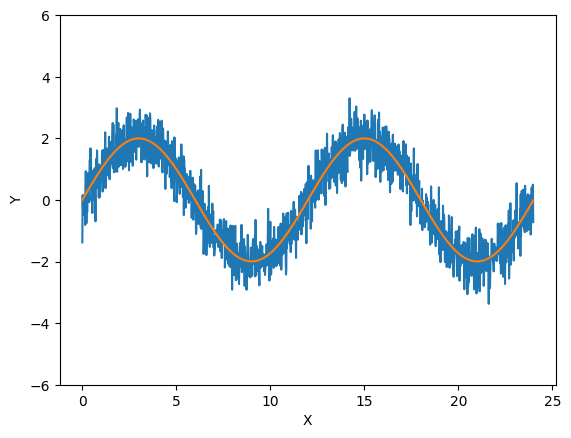

In [18]:
# placeholder text
plt.figure()
plt.plot(time_values / 60, actual_tide_values, label='Actual Tide')
plt.plot(time_values / 60, fitted_tide_values, label='Fitted Tide Model')
plt.ylim(-6, 6)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("demo.png", facecolor="m")
plt.show()